### Propuesta indicadores cultura
#### Indicador del presupuesto de cultura respecto al presupuesto total de la Ciudad de México

In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import os
import time
from matplotlib import pyplot as plt
import requests
import zipfile

In [128]:
##Descarga de presupuestos aprobados

presupuestos={
    '2024': 'https://datos.cdmx.gob.mx/dataset/3a6cba97-adb1-4f35-9df1-984cc3657aca/resource/7fa1da81-531c-477c-93db-7580bc1c7ad0/download/egresos_2024_aprobado.csv',
    '2023': 'https://datos.cdmx.gob.mx/dataset/ea119a03-4f5a-46fa-afbe-bc32bcf79ec3/resource/5137e3db-227e-462d-8d59-1942afbc0c6a/download/egresos_2023_aprobado.csv',
    '2022': 'https://datos.cdmx.gob.mx/dataset/755f47f1-b937-4131-8a7b-fbe306e747c8/resource/fc93c940-ad75-4e7f-afe6-c624726623a9/download/egresos_2022_aprobado.csv',
    '2021': 'https://datos.cdmx.gob.mx/dataset/246be014-62ba-46e0-a7ce-9f37c8f01886/resource/682c37bd-96a2-4f78-94bf-3c77c3870f04/download/egresos_2021_aprobado.csv',
    '2020':'https://datos.cdmx.gob.mx/dataset/2bb4de63-8212-4d2a-a377-98b10f8384c6/resource/def0fc56-4e26-4cd2-9ec6-200cb86b418e/download/egresos_2020_aprobado.csv',
    '2019': 'https://datos.cdmx.gob.mx/dataset/8dc52617-63f6-4bfd-9fae-54239675c6d0/resource/9a6f53d7-1751-4ae4-8bd8-d31807be7789/download/egresos_2019_aprobado.csv',
    '2018': 'https://datos.cdmx.gob.mx/dataset/7a8820f2-3bea-4c69-8b20-1d01b1a99a6a/resource/5b20655c-072f-4347-baee-ab93d930b27b/download/egresos_2018_aprobado.csv',
}

In [129]:
#Evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

In [130]:
#Tabla en blanco
presupuestos_aprobados=pd.DataFrame()

for key in presupuestos:
    presupuestos_aprobados=pd.concat([presupuestos_aprobados,pd.read_csv(presupuestos[key], encoding="latin-1", low_memory=False)])

In [131]:
presupuestos_aprobados.head()

,clave_presupuestaria,ciclo,periodo,gobierno_general,desc_gobierno_general,sector,desc_sector,subsector,desc_subsector,unidad_responsable,...,desc_consolidado,detalle_consolidado,desc_detalle_consolidado,proyecto_inv,desc_proy_inv,tipo_proyecto,desc_tipo_proyecto,monto_aprobado,monto_modificado,monto_ejercido
0,401C001131177P02011114011311100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"25,201,851.00",0.00,0.00
1,401C001131177P02011114011321100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"2,200,197.00",0.00,0.00
2,401C001131177P02011114012111100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"35,574,335.00",0.00,0.00
3,401C001131177P02011114012211108,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,8.00,Personal con nombramiento de carÃ¡cter provisi...,NaN,NaN,NaN,NaN,"252,548.00",0.00,0.00
4,401C001131177P02011114012311106,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,6.00,Pagos del capÃ­tulo 1000 diferentes a nÃ³mina ...,NaN,NaN,NaN,NaN,"60,000.00",0.00,0.00


In [132]:
presupuestos_aprobados["ciclo"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018], dtype=int64)

In [133]:
presupuestos_aprobados["cultural"] = (
    ((presupuestos_aprobados["desc_sector"] == "Cultura") & 
     (presupuestos_aprobados["area_funcional"].isin([242077, 242218, 242220, 183061, 242044])))
).astype(int)

In [134]:
# Calcular el presupuesto total por año
presupuesto_total_por_ano = presupuestos_aprobados.groupby("ciclo")["monto_aprobado"].sum()

gasto_cultural_por_ano = (
    presupuestos_aprobados[presupuestos_aprobados["cultural"] == 1]  
    .groupby("ciclo")["monto_aprobado"]  
    .sum()  
)


# Calcular el porcentaje del gasto cultural sobre el total
porcentaje_cultural = (
    gasto_cultural_por_ano / presupuesto_total_por_ano * 100
).reset_index(name="porcentaje_cultural")

# Crear un DataFrame combinado con los resultados
resultado = gasto_cultural_por_ano.reset_index(name="gasto_cultural").merge(
    presupuesto_total_por_ano.reset_index(name="presupuesto_total_cdmx"), on="ciclo"
)
resultado["porcentaje_cultural"] = (
    resultado["gasto_cultural"] / resultado["presupuesto_total_cdmx"] * 100
)
resultado

,ciclo,gasto_cultural,presupuesto_total_cdmx,porcentaje_cultural
0,2020,"321,207,940.00","238,974,793,216.00",0.13
1,2021,"220,652,365.00","217,962,157,170.00",0.10
2,2022,"225,378,707.00","234,005,875,723.00",0.10
3,2023,"688,615,665.00","248,415,083,383.00",0.28
4,2024,"954,158,234.00","267,965,350,437.00",0.36


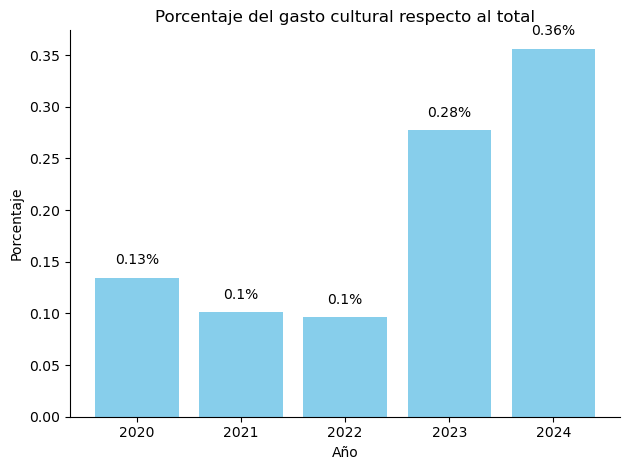

In [186]:
fig, ax = plt.subplots()

bars = ax.bar(resultado["ciclo"], resultado["porcentaje_cultural"], color="skyblue")


ax.set_title("Porcentaje del gasto cultural respecto al total")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.01,  
        f'{round(height, 2)}%',  
        ha='center', 
        va='bottom',  
        fontsize=10,
        color="black"
    )

plt.tight_layout()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#### Indicador de valor agregado bruto de Cultura respecto al total de la Ciudad de México

In [135]:
#Webdriver
driver = webdriver.Chrome(service=Service('C:/chromedriver.exe'))
driver.maximize_window()

In [142]:
#Establecer directorio de descarga
os.chdir("C:/Users/claud/Downloads")

In [143]:
url="https://inegi.org.mx/app/tabulados/default.aspx?pr=22&vr=4&in=90&tp=20&wr=1&cno=1&idrt=3270&opc=p"

In [144]:
driver.get(url)

In [145]:
#Descargar archivo csv
driver.find_element(By.ID, 'aCsv').click()
time.sleep(1)

In [172]:
#Leer archivo csv
df = pd.read_csv('CSCM_90.csv', encoding='utf-8')
#Drop primera fila
df=df.drop(0)
#Dejar de 36 a 69
df=df.iloc[35:67]
df.columns=df.columns.str.lower()
#Filtrar si concepto es "Ciudad de México"
df=df[df["concepto"]=="Ciudad de México"]
#Dejar columnas que contengan "valor agregado bruto"
df = df[["concepto"] + df.columns[df.columns.str.contains("valor agregado bruto")].tolist()]
#Dejar el nombre de "|" hacia la izquierda
df.columns=df.columns.str.split("|").str[0]
#pasar a long
df=pd.melt(df, id_vars=["concepto"], var_name="año", value_name="valor")
#Eliminar  caracteres especiales en la columna "año" para que sean solo números
df["año"]=df["año"].str.extract("(\d+)")
df

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\claud\AppData\Local\Temp\ipykernel_33512\1236678418.py:19: SyntaxWarning: invalid escape sequence '\d'
  df["año"]=df["año"].str.extract("(\d+)")


,concepto,año,valor
0,Ciudad de México,2008,8.42
1,Ciudad de México,2009,8.70
2,Ciudad de México,2010,8.27
3,Ciudad de México,2011,7.97
4,Ciudad de México,2012,7.68
5,Ciudad de México,2013,7.57
6,Ciudad de México,2014,7.79
7,Ciudad de México,2015,7.76
8,Ciudad de México,2016,7.30
9,Ciudad de México,2017,7.26


([<matplotlib.axis.YTick at 0x284c3240500>,
 [Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

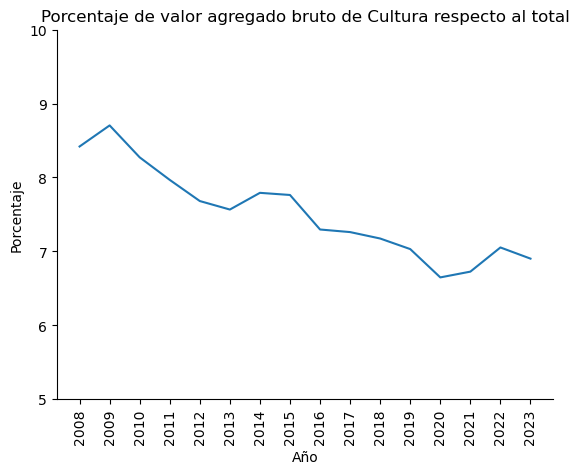

In [196]:
#Gráfica de línea
fig, ax = plt.subplots()

for concepto, datos in df.groupby("concepto"):
    ax.plot(datos["año"], datos["valor"], label=concepto)
    
ax.set_title("Porcentaje de valor agregado bruto de Cultura respecto al total")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#90 grados de rotación
plt.xticks(rotation=90)
#y de 0 a 10
plt.yticks(range(5, 11))

#### Indicador de población ocupada en actividades culturales en la Ciudad de México

In [14]:
url="https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2019_cdmx_csv.zip"

In [15]:
#Descarga y unzip

def download_unzip(url, path):
    r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'})
    with open(path, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(path, 'r') as z:
        z.extractall(path.replace('.zip', ''))
        #Eliminar el archivo zip
    os.remove(path)

In [16]:
#Generar carpeta data
os.makedirs("data", exist_ok=True)

In [17]:
#Descarga y unzip en data
download_unzip(url, "data/ce2019_cdmx_csv.zip")

In [68]:
## Leer datos
censoeco = (
    pd.read_csv(
        "data/ce2019_cdmx_csv/conjunto_de_datos/ce2019_cdmx.csv",
        sep=",",
        low_memory=False,
        index_col=False
    )
#Limpieza
    .rename(columns=lambda x: x.strip().lower())  #Renombrar
    #Filtros y selección de variables de interés
    .query("id_estrato.isnull()")
    .query("codigo == ' ' or codigo == '71'")
    .query("municipio == ' '")
    .loc[:, ["codigo", "h001a"]]
    .T
)

# Renombrar columnas
censoeco.columns = censoeco.iloc[0]
censoeco = (
    censoeco.iloc[1:]  # Eliminar primera fila
    .rename(columns={" ": "total", "71": "culturales"})
    .assign(porcentaje=lambda df: df["culturales"].astype(float) / df["total"].astype(float) * 100)  # Calcular porcentaje
)

censoeco

codigo,total,culturales,porcentaje
h001a,4297134.0,40921.0,0.952286


### Estimación de metas









































































































































































































































































































































































































































































































































































































































